<h1 style="font-family:Arial; font-size:32px; color:#ECF0F1; text-align:center; background-color:#F39C12; padding:10px; border-radius:10px;">WINE QUALITY ANALYSIS AND PREDICTION</h1>

<h1 style="font-family:Arial; font-size:32px; color:#ECF0F1; text-align:center; background-color:#F39C12; padding:10px; border-radius:10px;">IMPORT LIBRARIES AND DATASET</h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [3]:
data = pd.read_csv("winequality-red.csv")

In [4]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [34]:
data[data['quality'] == 4]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
18,7.4,0.590,0.08,4.4,0.086,6.0,29.0,0.99740,3.38,0.50,9.00,4
38,5.7,1.130,0.09,1.5,0.172,7.0,19.0,0.99400,3.50,0.48,9.80,4
41,8.8,0.610,0.30,2.8,0.088,17.0,46.0,0.99760,3.26,0.51,9.30,4
45,4.6,0.520,0.15,2.1,0.054,8.0,65.0,0.99340,3.90,0.56,13.10,4
73,8.3,0.675,0.26,2.1,0.084,11.0,43.0,0.99760,3.31,0.53,9.20,4
79,8.3,0.625,0.20,1.5,0.080,27.0,119.0,0.99720,3.16,1.12,9.10,4
94,5.0,1.020,0.04,1.4,0.045,41.0,85.0,0.99380,3.75,0.48,10.50,4
151,9.2,0.520,1.00,3.4,0.610,32.0,69.0,0.99960,2.74,2.00,9.40,4
161,7.6,0.680,0.02,1.3,0.072,9.0,20.0,0.99650,3.17,1.08,9.20,4
167,7.3,0.550,0.03,1.6,0.072,17.0,42.0,0.99560,3.37,0.48,9.00,4


<h1 style="font-family:Arial; font-size:32px; color:#ECF0F1; text-align:center; background-color:#F39C12; padding:10px; border-radius:10px;">DATA EXPLORATORY ANALYSIS</h1>

In [6]:
data.shape

(1599, 12)

In [7]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [9]:
data['quality'].unique()

array([5, 6, 7, 4, 8, 3])

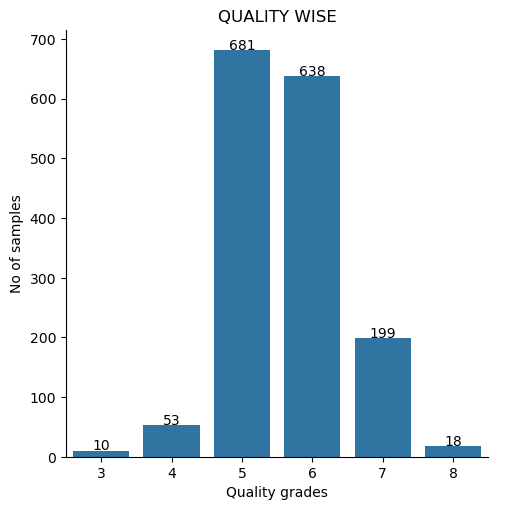

In [10]:
ax=sns.catplot(x = 'quality', data =data, kind ='count')

for p in ax.ax.patches:  
    height = p.get_height()
    ax.ax.text(
        x=p.get_x() + p.get_width() / 2,
        y=height + 1,
        s=f'{height:.0f}',
        ha='center'  # correct alignment
    )


plt.title("QUALITY WISE")
plt.xlabel("Quality grades")
plt.ylabel("No of samples")
plt.savefig("Winr quality vs count.png")
plt.show()

<h1 style="font-family:Arial; font-size:20px; color:#ECF0F1; text-align:left; background-color:#F39C12; padding:10px; border-radius:10px;">plot relation between all labels and quality</h1>

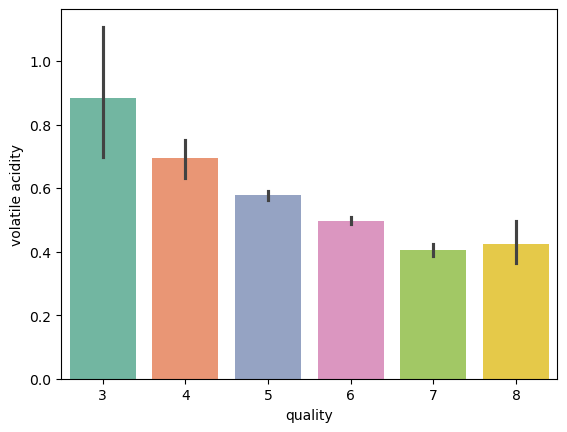

In [11]:
sns.barplot(x ='quality', y= 'volatile acidity', palette="Set2", data =data)
plt.savefig("Quality vs Volatile acidity")
plt.show()

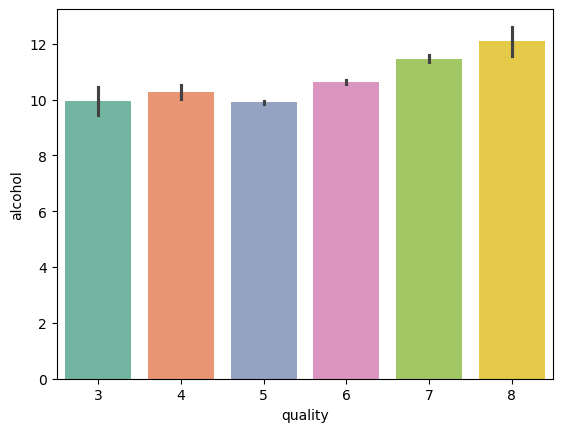

In [12]:
sns.barplot(x ='quality', y= 'alcohol',  palette="Set2",data =data)
plt.savefig("Quality vs Alcohol")
plt.show()

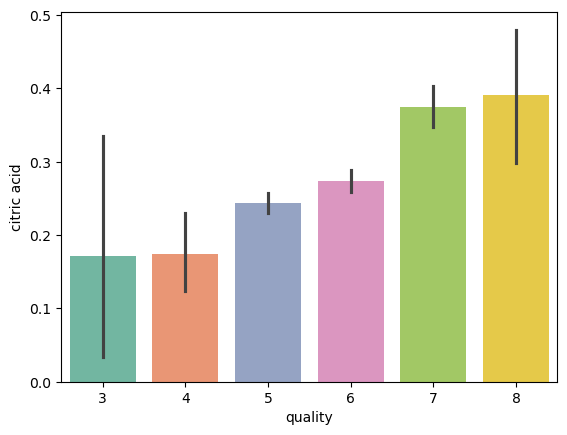

In [13]:
sns.barplot(x ='quality', y= 'citric acid', palette="Set2", data =data)
plt.savefig("quality vs citric acid")
plt.show()

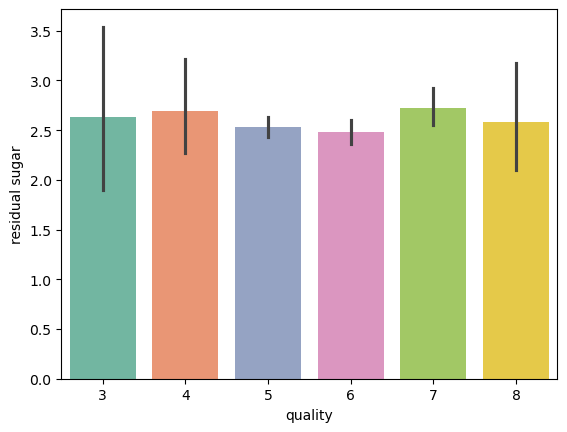

In [14]:
sns.barplot(x ='quality', y= 'residual sugar', palette="Set2", data =data)
plt.show()

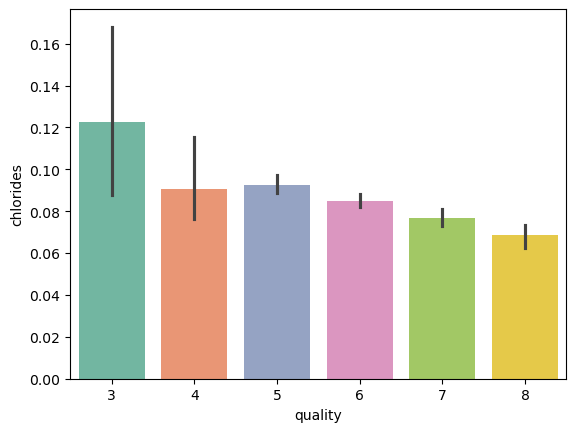

In [15]:
sns.barplot(x ='quality', y= 'chlorides',  palette="Set2",data =data)
plt.show()

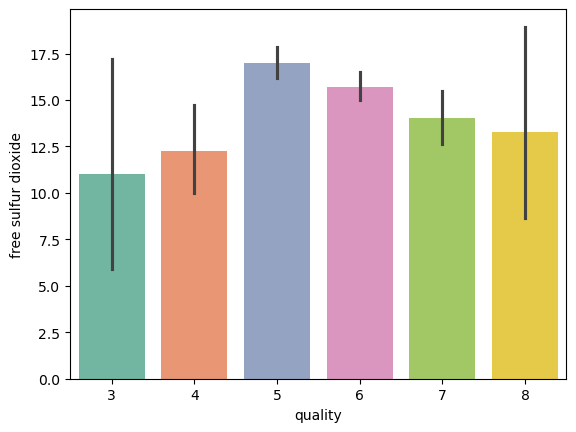

In [16]:
sns.barplot(x ='quality', y= 'free sulfur dioxide', palette="Set2", data =data)
plt.show()

In [17]:
corelation = data.corr()

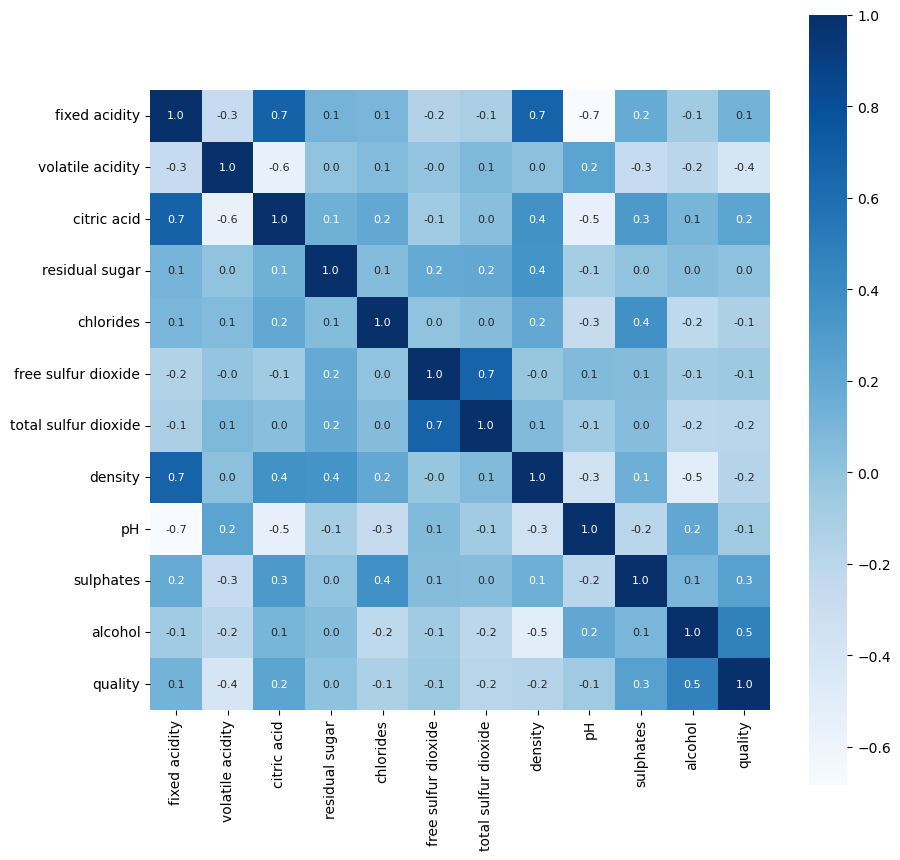

In [18]:
plt.figure(figsize=(10,10))
sns.heatmap(corelation,cbar =True,fmt ='.1f',square =True,annot =True,annot_kws ={'size':8},cmap ='Blues')
plt.show()

In [19]:
x = data.drop(['quality'], axis =1)

<h1 style="font-family:Arial; font-size:20px; color:#ECF0F1; text-align:LEFT; background-color:#F39C12; padding:10px; border-radius:10px;">WINE QUALITY GRADES ARE 3,4,5,6,7,8 THE 3,4,5,6 ARE GOOD GRADE AND 7,8 ARE BAD GRADE</h1>

In [20]:
y = data['quality']

In [21]:
y.unique()

array([5, 6, 7, 4, 8, 3])

In [22]:
x_train,x_test,y_train,y_test =train_test_split(x,y,random_state =11,test_size =0.2)

In [23]:
print(x_train.shape,
          x_test.shape
      ,y_train.shape,
      y_test.shape)

(1279, 11) (320, 11) (1279,) (320,)


model1 = RandomForestClassifier(
    n_estimators=100,               # Number of trees in the forest
    criterion="gini",           # "gini", "entropy", "log_loss"
    max_depth=None,                # Max depth of tree
    min_samples_split=2,           # Minimum samples required to split a node
    min_samples_leaf=1,            # Minimum samples at a leaf node
    min_weight_fraction_leaf=0.0,  # Minimum weighted fraction at a leaf
    max_features="sqrt",           # Features considered at each split: "sqrt", "log2", None, or int/float
    max_leaf_nodes=None,           # Max number of leaf nodes
    min_impurity_decrease=0.0,     # Split only if impurity decrease >= value
    bootstrap=True,                # Whether to bootstrap samples
    oob_score=False,               # Use out-of-bag samples for validation
    n_jobs=None,                   # Parallel jobs (-1 = use all cores)
    random_state=None,             # Random seed
    verbose=0,                     # Verbosity level
    warm_start=False,              # Reuse previous solution to add more estimators
    class_weight=None,             # Handle imbalanced classes: "balanced", "balanced_subsample", or dict
    ccp_alpha=0.0,                 # Complexity parameter for Minimal Cost-Complexity Pruning
    max_samples=None               # If bootstrap=True, number of samples drawn per tree
)           

In [24]:
model = RandomForestClassifier()

In [25]:
model.fit(x_train,y_train)

RandomForestClassifier()

In [26]:
pred = model.predict(x_test)

In [27]:
ACCURACY =accuracy_score(pred,y_test)
ACCURACY

0.684375

In [28]:
from sklearn.metrics import confusion_matrix

In [29]:
confusion_matrix(y_test, pred)

array([[  0,   0,   3,   0,   0,   0],
       [  1,   0,   6,   2,   0,   0],
       [  0,   0, 105,  32,   1,   0],
       [  0,   0,  25,  91,   3,   0],
       [  0,   2,   3,  19,  23,   0],
       [  0,   0,   0,   1,   3,   0]])

In [30]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, x, y, cv=5)
print("Cross-Validation Accuracy:", scores.mean())

Cross-Validation Accuracy: 0.5709757053291536


<h1 style="font-family:Arial; font-size:20px; color:#ECF0F1; text-align:LEFTr; background-color:#F39C12; padding:10px; border-radius:10px;">PREDCIT TESTING AND SAVE THE MODEL</h1>

In [31]:
input = (10.4,0.610,0.49,2.10,0.200,5.0,16.0,0.99940,3.16,0.63,8.40)
array = np.asarray(input)

In [36]:
sha =array.reshape(1,-1)
predd =model.predict(sha)
predd

array([3])

In [33]:
import pickle
with open("model.pkl",'wb') as f:
    pickle.dump(model,f)

## Thankyou ##